In [19]:
import numpy as np
import matplotlib.pyplot as plt
import requests, zipfile, io, gzip, glob, os
import pandas as pd

In [36]:
# download data from a GPS station from the UNR geodesy website
# http://geodesy.unr.edu/NGLStationPages/gpsnetmap/GPSNetMap_STEPS.html

sta = 'P563'
sta = 'P630'
sta = 'P395'
sta = 'P696'

list_sta = ['P563','P630','P395','P696']

In [37]:


# This section downloads the data
# ----------------------------------------
# .tenv format (east,north,up time series)
# ----------------------------------------

# 1.   station name
# 2.   date
# 3.   decimal year
# 4.   modified Julian day
# 5.   GPS week
# 6.   day of GPS week
# 7.   longitude (degrees) of reference meridian
# 8. delta e (m)
# 9. delta n (m)
# 10. delta v (m)
# 11. antenna height (m)
# 12. sigma e (m)
# 13. sigma n (m)
# 14. sigma v (m)
# 15. correlation en
# 16. correlation ev
# 17. correlation nv

# create a list of strings with itemized list above
ll = ['station ID (SSSS)','date (yymmmdd)',
'decimal year','modified Julian day','GPS week','day of GPS week',
'longitude (degrees) of reference meridian','delta e (m)',
'delta n (m)','delta v (m)','antenna height (m)',
'sigma e (m)','sigma n (m)','sigma v (m)',
'correlation en','correlation ev','correlation nv']
      



print("http://geodesy.unr.edu/gps_timeseries/tenv/IGS14/" + sta + ".tenv")
zip_file_url="http://geodesy.unr.edu/gps_timeseries/tenv/IGS14/"+ sta + ".tenv"
r = requests.get(zip_file_url)

# transform r.content into a pandas dataframe
# first split r.content with \n separator
# Decode the content if it's in bytes
content_str = r.content.decode('utf-8')

# Split the content by the newline character
lines = content_str.split('\n')

# Now `lines` is a list of strings, each representing a line from the content
print(lines[0])

# then transform lines into a pandas dataframe
df = pd.DataFrame([x.split() for x in lines])
# assign column names to df a
df.columns = ll

#convert columns to numeric
df = df.apply(pd.to_numeric, errors='ignore')

df.head()

http://geodesy.unr.edu/gps_timeseries/tenv/IGS14/P696.tenv
P696 04OCT15 2004.7885 53293 1292 5 -122.2  3733.49076   5117969.91968 1600.03425  0.0083 0.00071 0.00094 0.00302 -0.04421  0.18598 -0.17167


,station ID (SSSS),date (yymmmdd),decimal year,modified Julian day,GPS week,day of GPS week,longitude (degrees) of reference meridian,delta e (m),delta n (m),delta v (m),antenna height (m),sigma e (m),sigma n (m),sigma v (m),correlation en,correlation ev,correlation nv
0,P696,04OCT15,2004.7885,53293.0,1292.0,5.0,-122.2,3733.49076,5.117970e+06,1600.03425,0.0083,0.00071,0.00094,0.00302,-0.04421,0.18598,-0.17167
1,P696,04OCT16,2004.7912,53294.0,1292.0,6.0,-122.2,3733.49272,5.117970e+06,1600.02976,0.0083,0.00071,0.00092,0.00294,-0.06798,0.18073,-0.16627
2,P696,04OCT17,2004.7940,53295.0,1293.0,0.0,-122.2,3733.48973,5.117970e+06,1600.03416,0.0083,0.00069,0.00092,0.00287,-0.07413,0.16217,-0.16518
3,P696,04OCT18,2004.7967,53296.0,1293.0,1.0,-122.2,3733.48667,5.117970e+06,1600.03919,0.0083,0.00072,0.00095,0.00310,-0.06797,0.19606,-0.19121
4,P696,04OCT19,2004.7995,53297.0,1293.0,2.0,-122.2,3733.48953,5.117970e+06,1600.03890,0.0083,0.00072,0.00096,0.00304,-0.09258,0.17398,-0.21949


In [26]:
# drop nan values
df = df.dropna()

In [22]:
# convert

In [27]:
df.describe()

,decimal year,modified Julian day,GPS week,day of GPS week,longitude (degrees) of reference meridian,delta e (m),delta n (m),delta v (m),antenna height (m),sigma e (m),sigma n (m),sigma v (m),correlation en,correlation ev,correlation nv
count,7231.000000,7231.000000,7231.000000,7231.000000,7.231000e+03,7231.000000,7.231000e+03,7231.000000,7231.0000,7231.000000,7231.000000,7231.000000,7231.000000,7231.000000,7231.000000
mean,2014.713187,56917.991426,1810.141474,3.001106,-1.222000e+02,3733.392230,5.117970e+06,1600.001132,0.0083,0.000703,0.000910,0.002950,-0.063962,0.225988,-0.162199
std,5.736159,2095.132046,299.304418,2.000415,2.842367e-14,0.054192,4.237371e-02,0.010962,0.0000,0.000027,0.000036,0.000131,0.028204,0.041899,0.028416
min,2004.788500,53293.000000,1292.000000,0.000000,-1.222000e+02,3733.288480,5.117970e+06,1599.968100,0.0083,0.000650,0.000850,0.002680,-0.175770,0.063880,-0.276740
25%,2009.742650,55102.500000,1551.000000,1.000000,-1.222000e+02,3733.344680,5.117970e+06,1599.993260,0.0083,0.000690,0.000890,0.002870,-0.084090,0.193410,-0.180235
50%,2014.696800,56912.000000,1809.000000,3.000000,-1.222000e+02,3733.390760,5.117970e+06,1600.000830,0.0083,0.000700,0.000900,0.002940,-0.066360,0.224530,-0.160390
75%,2019.678300,58731.500000,2069.000000,5.000000,-1.222000e+02,3733.437840,5.117970e+06,1600.008830,0.0083,0.000710,0.000930,0.003020,-0.042225,0.254170,-0.143075
max,2024.646100,60546.000000,2328.000000,6.000000,-1.222000e+02,3733.505170,5.117970e+06,1600.048580,0.0083,0.001360,0.001940,0.006180,0.086470,0.387100,-0.062230


In [29]:
# remove first value for delta e, delta n, delta v to make relative position with respect to the first time. Add these as new columns
df['new delta e (m)'] = df['delta e (m)'] - df['delta e (m)'].values[0]
df['new delta n (m)'] = df['delta n (m)'] - df['delta n (m)'].values[0]
df['new delta v (m)'] = df['delta v (m)'] - df['delta v (m)'].values[0]

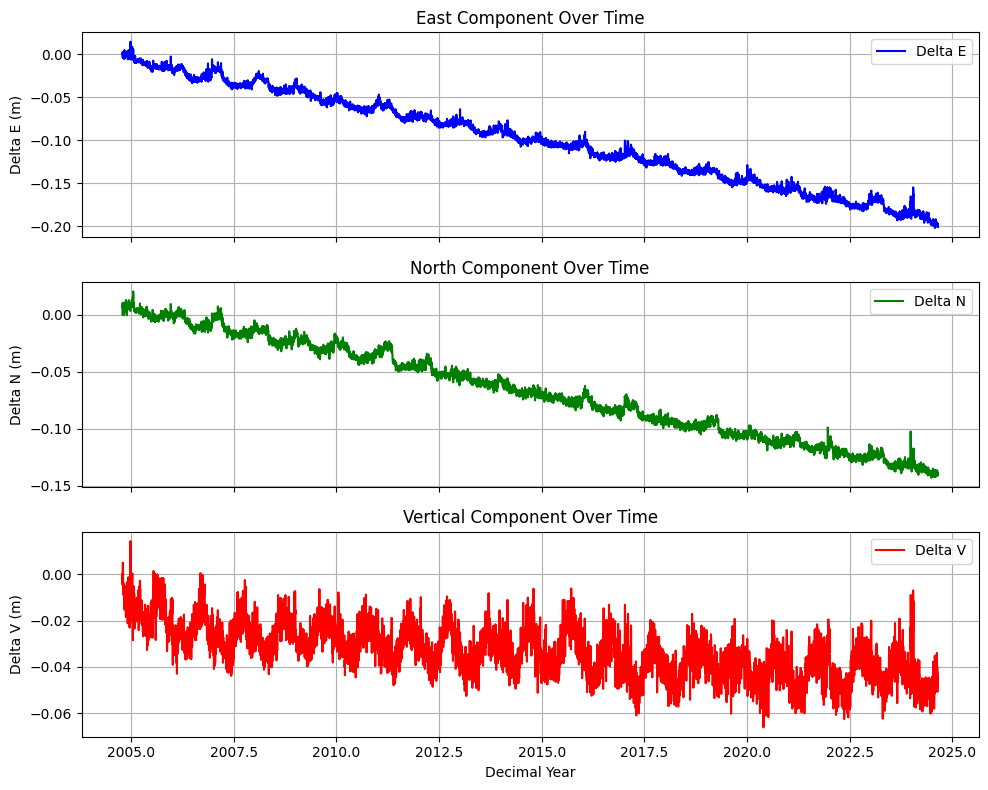

In [32]:
import matplotlib.pyplot as plt

# Create a figure and a set of subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 8), sharex=True)

# Plot the data
axs[0].plot(df['decimal year'], df['new delta e (m)'], color='b', label='Delta E')
axs[1].plot(df['decimal year'], df['new delta n (m)'], color='g', label='Delta N')
axs[2].plot(df['decimal year'], df['new delta v (m)'], color='r', label='Delta V')

# Set titles and labels
axs[0].set_title('East Component Over Time')
axs[1].set_title('North Component Over Time')
axs[2].set_title('Vertical Component Over Time')

# Set y-axis labels
axs[0].set_ylabel('Delta E (m)')
axs[1].set_ylabel('Delta N (m)')
axs[2].set_ylabel('Delta V (m)')

# Set x-axis label for the last subplot
axs[2].set_xlabel('Decimal Year')

# Add grids to all subplots
for ax in axs:
    ax.grid(True)
    ax.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
# save a new CSV file with the relative position
# only keep the columns that are needed (decimal year, new delta e, new delta n, new delta v)
df2 = df[['decimal year', 'new delta e (m)', 'new delta n (m)', 'new delta v (m)']]
df2.to_csv('data_gps_'+ sta + '_relative_position.csv', index=False)

In [38]:
# now write a loop to download all the stations and save the relative position data

for sta in list_sta:

    zip_file_url="http://geodesy.unr.edu/gps_timeseries/tenv/IGS14/"+ sta + ".tenv"
    r = requests.get(zip_file_url)

    # transform r.content into a pandas dataframe
    # first split r.content with \n separator
    # Decode the content if it's in bytes
    content_str = r.content.decode('utf-8')

    # Split the content by the newline character
    lines = content_str.split('\n')

    # Now `lines` is a list of strings, each representing a line from the content
    print(lines[0])

    # then transform lines into a pandas dataframe
    df = pd.DataFrame([x.split() for x in lines])
    # assign column names to df a
    df.columns = ll

    #convert columns to numeric
    df = df.apply(pd.to_numeric, errors='ignore')

    df = df.dropna()

    # remove first value for delta e, delta n, delta v to make relative position with respect to the first time. Add these as new columns
    df['new delta e (m)'] = df['delta e (m)'] - df['delta e (m)'].values[0]
    df['new delta n (m)'] = df['delta n (m)'] - df['delta n (m)'].values[0]
    df['new delta v (m)'] = df['delta v (m)'] - df['delta v (m)'].values[0]


    df2 = df[['decimal year', 'new delta e (m)', 'new delta n (m)', 'new delta v (m)']]
    df2.to_csv('data_gps_'+ sta + '_relative_position.csv', index=False)


P563 05DEC16 2005.9576 53720 1353 5 -119.4 -1922.08471   3921041.89948   56.64177  0.0083 0.00069 0.00086 0.00282 -0.00568  0.05312 -0.06647
P630 06NOV17 2006.8775 54056 1401 5 -119.0   -38.94640   4164547.81842 2740.58504  0.0083 0.00071 0.00083 0.00285 -0.02957 -0.11993 -0.09226
P395 06JAN25 2006.0671 53760 1359 3 -123.9  3347.67917   4987420.31375   53.03678  0.0083 0.00069 0.00105 0.00327 -0.04832  0.01695 -0.31816
P696 04OCT15 2004.7885 53293 1292 5 -122.2  3733.49076   5117969.91968 1600.03425  0.0083 0.00071 0.00094 0.00302 -0.04421  0.18598 -0.17167
